# Bandit tests

In [1]:
import bandits


## Arms

In [2]:
arm = bandits.DeterministicArm()
arm.sample(context=[0] * 2)


array([0.5488135, 0.5488135])

In [3]:
import scipy.stats
scipy.stats.bernoulli(0.5).rvs()

1

[0.28412682 0.57011077 0.24227026 0.41528042 0.65409829 0.01670969
 0.87765172 0.43619543 0.5752041  0.4253409 ]


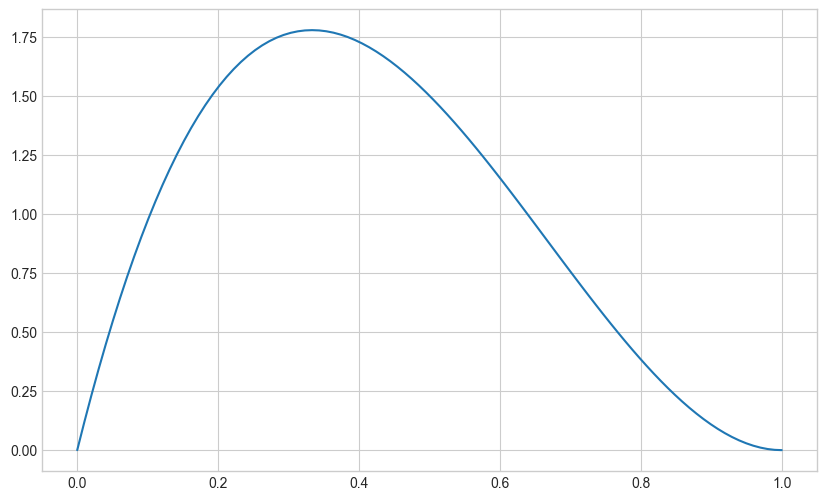

In [4]:
arm = bandits.BetaArm(2, 3)
print(arm.sample(context=[0] * 10))
fig = arm.plot_pdf()


## Policies

In [5]:
import scipy.stats
import matplotlib.pyplot as plt
import numpy as np
dist = scipy.stats.beta(a=[5, 10], b=[10, 5])
dist.rvs()
x = np.linspace(-10, 10, 100)
y = dist.pdf(x)
# scipy.stats.norm(self.a[_arms], self.b[_arms]).rvs()

fig, ax = plt.subplots(figsize=(6, 4))
ax.plot(x, y)


ValueError: operands could not be broadcast together with shapes (2,) (100,) 

In [ ]:
scipy.stats.norm(loc=[0.0,1.0], scale=[10.0, 5.0]).rvs(size=(1000,2)).mean(axis=0)

array([-0.10069865,  1.16625509])

In [ ]:
policy = bandits.UCB(n_arms=2)
display(policy)
display(policy.predict())
policy.update(arms=[[0]] * 5 + [[1]] * 2, rewards=[[1]] * 5 + [[0]] * 2)
display(policy)
display(policy.predict())

policy.update(arms=[[1]] * 10 + [[0]] * 2, rewards=[[1]] * 10 + [[0]] * 2)
display(policy)
display(policy.predict())


UCB(counts:[0 0], reward_means[0. 0.])

/Users/rich/Developer/Github/VariousDataAnalysis/Unpublished/bandits/bandits.py:181: RuntimeWarning: divide by zero encountered in log
  * np.log(self.arm_counts[_arms].sum())
/Users/rich/Developer/Github/VariousDataAnalysis/Unpublished/bandits/bandits.py:179: RuntimeWarning: invalid value encountered in sqrt
  _ucb_values = self.reward_means[_arms] + np.sqrt(


([[0]], None, [array([0., 0.])])

UCB(counts:[5 2], reward_means[1. 0.])

([[0]], None, [array([1., 0.])])

UCB(counts:[ 7 12], reward_means[0.71428571 0.83333333])

([[0]], None, [array([0.71428571, 0.83333333])])

In [ ]:
policy = bandits.RandomPolicy()
display(policy)
display(policy.predict())
policy.update(arms=[[0]] * 5 + [[1]] * 2, rewards=[[1]] * 5 + [[0]] * 2)
display(policy)
display(policy.predict())

policy.update(arms=[[1]] * 10 + [[0]] * 2, rewards=[[1]] * 10 + [[0]] * 2)
display(policy)
display(policy.predict())


([[3]], None, [])

([[0]], None, [])

([[1]], None, [])

## Simulations

Beta-Bernoulli system

In [ ]:
# create many arms
n_arms = 3
# arms = [bandits.DeterministicArm() for _idx in range(n_arms)]
arms = [bandits.BernoulliArm() for _idx in range(n_arms)]
print(arms)

# create Thompson Sampling policy
policy = bandits.ThompsonSamplingBeta(n_arms=n_arms)
print(policy)


[Bernoulli(0.8627185179052884), Bernoulli(0.6095838792828133), Bernoulli(0.5554952616906133)]
Beta([1 1 1], [1 1 1])


[[0], [0], [0], [0], [0], [0], [0], [0], [0], [0]]

[[1], [1], [1], [1], [1], [0], [1], [1], [1], [1]]

Beta([204   3   3], [28  4  4])

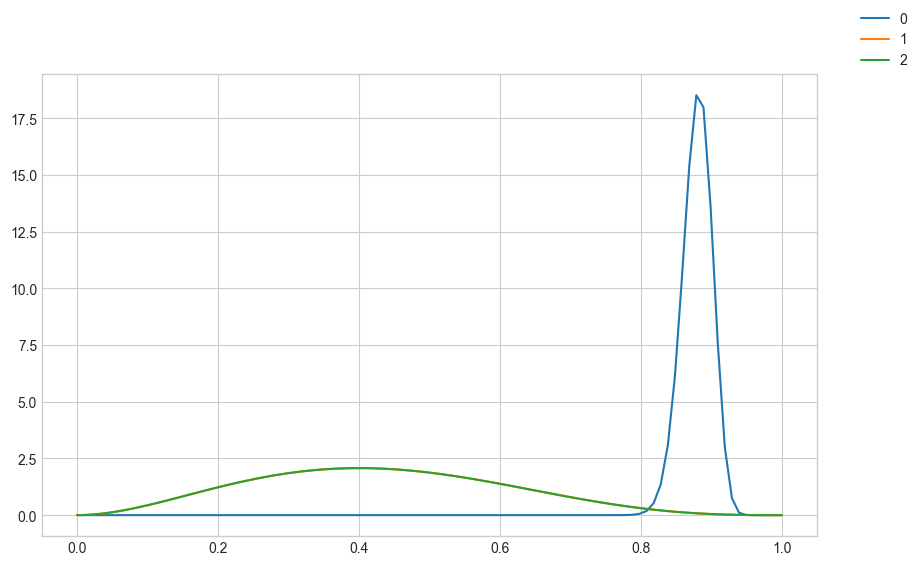

In [ ]:
batch_size = 10
# 2.5ms - 10, 25ms - 100, 250ms - 1000, 2.5s - 10_000

selected_arms, selection_propensities, reward_estimates = policy.predict(
    arms=[range(0, n_arms)] * batch_size
)
rewards = [
    [arms[_idx].sample()[0] for _idx in _selected_arms]
    for _selected_arms in selected_arms
]
policy.update(arms=selected_arms, rewards=rewards)
display(selected_arms)
display(rewards)
display(policy)

fig = policy.plot_pdf()
fig.legend()

Gaussian-Gaussian system

In [6]:
# create many arms
n_arms = 3
arms = [bandits.GaussianArm() for _idx in range(n_arms)]
print(arms)

# create Thompson Sampling policy
policy = bandits.ThompsonSamplingGaussian(n_arms=n_arms)
print(policy)


[Gaussian(-8.069489237789757,1.5896958364551972), Gaussian(-1.0637014010698436,1.1037514116430513), Gaussian(-4.477332805968378,1.965823616800535)]
Gaussian([0. 0. 0.], [10. 10. 10.])


[[1], [1], [1], [1], [1], [1], [1], [1], [1], [1]]

[[-2.1031760801804413],
 [-0.9311019418463605],
 [0.2633849783677804],
 [-2.9160180905918334],
 [-1.7181682478444544],
 [0.0959361284316469],
 [-1.0588372880156387],
 [-1.0589892244589505],
 [-3.0363355267606065],
 [-1.857995001015567]]

Gaussian([-7.727353   -1.17763125 -5.03578636], [2.55398   0.0043855 0.9411043])

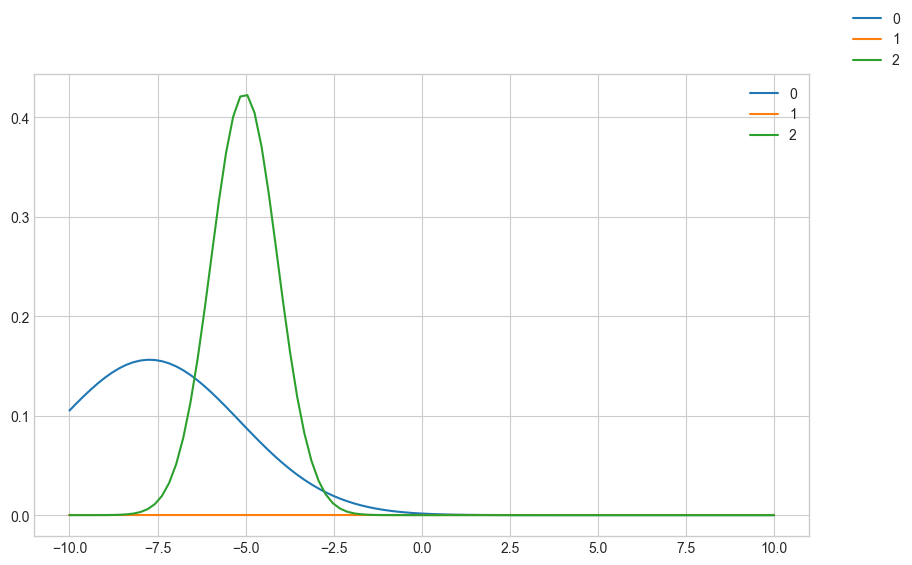

In [63]:
batch_size = 10
# 2.5ms - 10, 25ms - 100, 250ms - 1000, 2.5s - 10_000

selected_arms, selection_propensities, reward_estimates = policy.predict(
    arms=[range(0, n_arms)] * batch_size
)
rewards = [
    [arms[_idx].sample()[0] for _idx in _selected_arms]
    for _selected_arms in selected_arms
]
policy.update(arms=selected_arms, rewards=rewards)
display(selected_arms)
display(rewards)
display(policy)

fig = policy.plot_pdf()
fig.legend()